# PWFA collider tracking example

By Carl A. Lindstrøm (University of Oslo), 17 Sep 2025

In [1]:
from abel import *

In [2]:
# run a 10 TeV PWFA collider
pwfa_collider = PWFACollider()
pwfa_collider.com_energy = 10e12
pwfa_collider.run('pwfa_collider_example', overwrite=True)

>> LINAC #1
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  1.0%, ε =  1.00/  0.98 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  249.4 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε =  1.00/  0.98 mm-mrad
    ... #2  StageBasic #1           (s =  289.4 m) :   E =  45.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε =  1.02/  0.99 mm-mrad
    ... #3  InterstagePlasmaLensBasic (s =  303.8 m) :   E =  45.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε =  1.02/  0.99 mm-mrad
    ... #4  StageBasic #2           (s =  343.8 m) :   E =  85.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε =  1.02/  0.99 mm-mrad
    ... #5  InterstagePlasmaLensBasic (s =  364.2 m) :   E =  85.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε =  1.02/  0.99 mm-mrad
    ... #6  StageBasic #3           (s =  404.2 m) :   E = 125.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε =  1.03/  0.99 mm-mrad
    ... #7  InterstagePlasmaLens

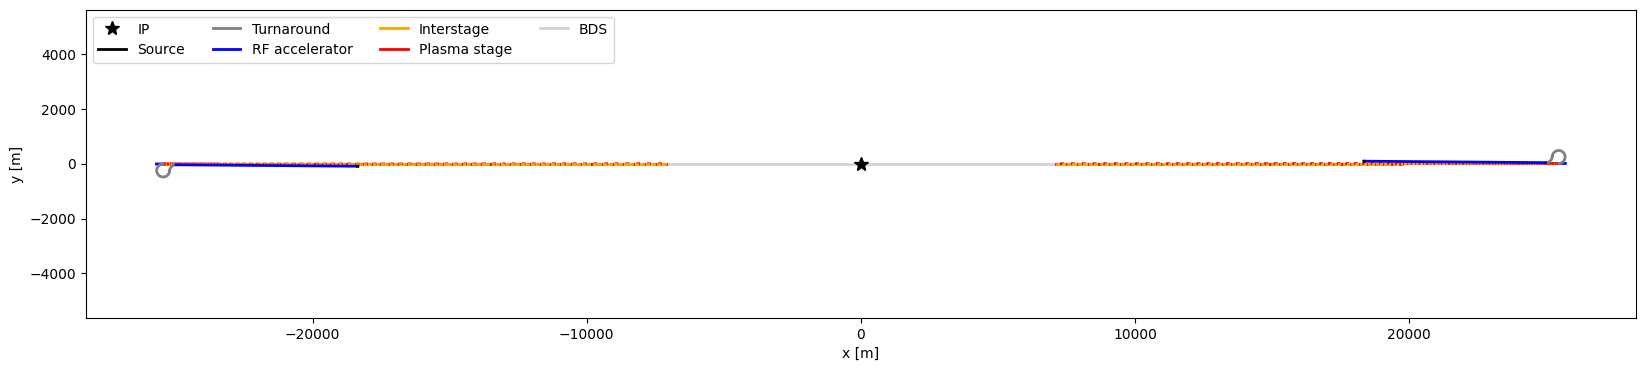

In [3]:
# plot the collider survey
pwfa_collider.plot_survey()

In [4]:
# print the collider cost estimate
pwfa_collider.print_cost()

-- COSTS -----------------------------------------
-- Construction: 14655 MILCU
   -- Plasma linac: 6154 MILCU
      -- Polarized electron source: 82 MILCU
      -- RF injector: 37 MILCU
         -- Instrumented beamline (25%): 1 MILCU
         -- RF structures (74x): 21 MILCU
         -- Klystrons (74x, 8 MW peak, 42 kW avg): 14 MILCU
      -- Driver complex: 2478 MILCU
         -- Source: 10 MILCU
         -- Driver RF linac: 2096 MILCU
            -- Instrumented beamline (25%): 25 MILCU
            -- RF structures (2159x): 571 MILCU
            -- Klystrons (2160x, 18 MW peak, 90 kW avg): 1500 MILCU
         -- Turnaround: 67 MILCU
         -- Civil construction: 305 MILCU
            -- Driver source (cut & cover + surface building): 1 MILCU
            -- Driver RF linac (cut & cover + surface building): 285 MILCU
            -- TurnaroundBasic (small tunnel): 19 MILCU
      -- Plasma stages (125x): 231 MILCU
      -- Interstages: 539 MILCU
      -- Driver dumps (125x, 25 MW tot